<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER4%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 분류(classification)의 개요**

앙상블을 주로 다루는 챕터입니다. 앙상블은 정형 데이터의 예측 분석 영역에서 매우 좋은 예측 성능을 발휘합니다. 대부분 동일한 알고리즘을 결합하며, 기본 알고리즘으로 사용하는 것은 결정 트리입니다.

# **2. 결정 트리**

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듭니다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다. 쉽게 예측할 수 있는 조건을 찾아서 분류하는 것이 가장 효율적이기 때문입니다.

이러한 정보 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 **정보 이득(Information Gain)**과 지니계수입니다.

정보 이득은 **엔트로피(주어진 데이터 집합의 혼잡도)**를 기반으로 합니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다. 

지니 계수는 경제학에서 불평등 지수를 나타내는 데 쓰이는 지수입니다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석하고, 지니 계수가 낮은 속성을 기준으로 분할합니다. 다시 말하면, 데이터 세트를 분할하는 데 가장 좋은 조건은 정보 이득이 높거나 지니 계수가 낮은 조건입니다. `DecisionTreeClassifier` 클래스는 기본적으로 지니 계수를 이용하여 데이터를 분할합니다. 

## **2.1. 결정 트리 모델의 특징**

결정 트리는 정보 균일도가 기반이므로 쉽고 직관적입니다. 대부분의 경우 피처 스케일링과 정규화 같은 전처리 작업도 불필요합니다. 다만 과적합되기 쉬우므로 트리 크기를 제한하면서 성능을 튜닝하는 편이 좋습니다.

## **2.2. 결정 트리 파라미터**

- `min_samples_split`: 노드를 분할하기 위한 최소한의 샘플 데이터 수를 지정합니다. 과적합 제어에 사용하며, 디폴트는 `2`이고, 작게 지정할수록 분할되는 노드가 많아져서 과적합되기 쉽습니다. 

- `min_samples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 데이터 수를 지정합니다. 과적합 제어에 사용하며, 비대칭적인 데이터의 경우 특정 클래스의 데이터가 작을 수 있으므로 숫자를 작게 지정할 필요가 있습니다. 

- `max_features`: 최적 분할을 위해 고려할 최대 피처 개수를 지정합니다. 디폴트는 `None`이며 모든 피처를 사용하여 분할합니다. `int`는 대상 피처의 개수, `float`는 전체 피처 중 대상 피처의 퍼센트, `sqrt`는 $\sqrt{전체 피처 개수}$, `auto`는 `sqrt`와 동일하고, `log`는 전체 피처 중 $log2(전체 피처 개수)$입니다.

- `max_depth`: 트리의 최대 깊이를 지정합니다. 디폴트는 `None`이며 클래스 결정값이 될 때까지 깊이를 키워서 분할하거나 노드가 가지는 데이터 수가 `min_samples_leaf`보다 작아질 때까지 깊이를 키웁니다.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정합니다.

## **2.3. 결정 트리 모델의 시각화**

붓꽃 데이터 세트를 시각화해보겠습니다. 먼저 학습을 수행합니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

`export_graphviz()` 메서드를 호출하여 그래프로 시각화할 출력 파일을 생성하겠습니다.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

`graphviz` 패키지를 사용하여 결정 트리를 시각화하겠습니다.

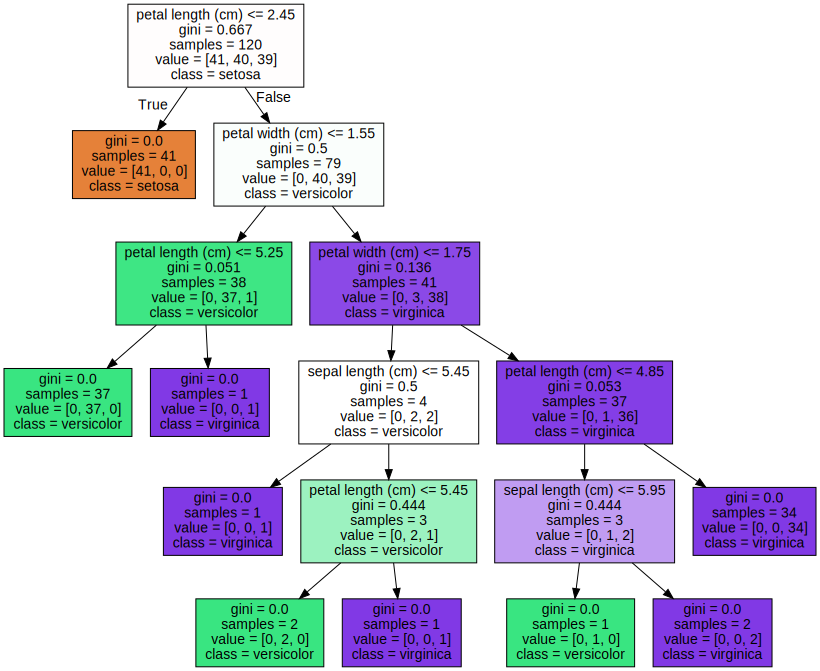

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

피처 중요도를 출력해보겠습니다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


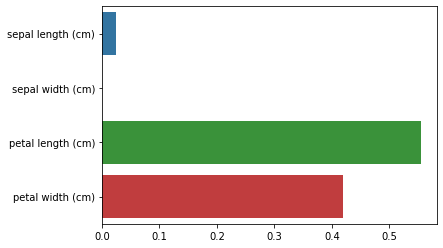

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)
plt.show()

## **2.4. 결정 트리 과적합(overfitting)**

`make_classification()` 함수를 사용하여 피처 2개가 클래스 값을 3개만큼 가진 임의의 데이터 세트를 만들고 그래프로 시각화하겠습니다.

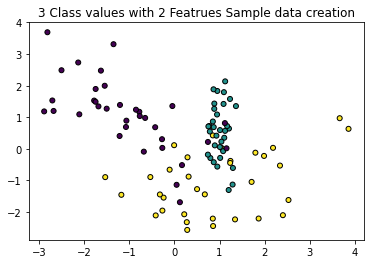

In [ ]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Featrues Sample data creation')
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

본서의 부록에서 가져온 시각화 함수를 사용하여 결정 기준 경계를 시각화해보겠습니다. 먼저 분류기의 하이퍼 파라미터를 기본값으로 학습시키고 구현하겠습니다.

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수입니다.
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터를 scatter plot으로 나타냅니다.
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 학습 데이터로 모델을 학습합니다.
    model.fit(X, y)
    # `meshgrid` 형태인 모든 좌표값으로 예측을 수행합니다. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # `contourf()` 메서드를 이용하여 class boundary를 시각화합니다.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

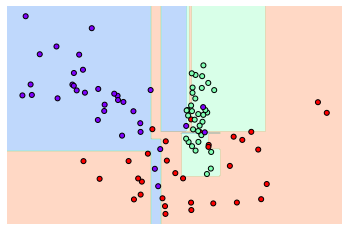

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치(Outlier)까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 많습니다. 하이퍼 파라미터를 기본값으로 학습한 모델은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 기준을 가지고 있습니다. 과대적합을 의미합니다. 

하이퍼 파라미터를 조금 조정하여 시각화해보겠습니다.

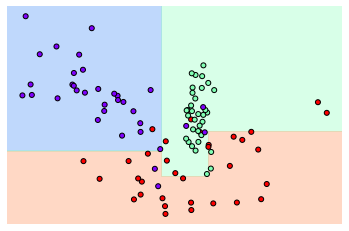

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 민감하지 않은 모델입니다. 이 모델이 과대적합된 위 모델보다 더 나은 예측 성능을 낼 것입니다. 

## **2.5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트**

[UCI 머신러닝 리포지토리의 사용자 행동 인식 데이터 세트](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)에 대한 예측 분류를 수행하겠습니다. 이 데이터는 피실험자 30명에게 스마트폰 센서를 장착시키고 동작과 관련된 여러 피처를 수집한 것입니다.

먼저 피처 종류를 확인해보겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/gdrive/


In [ ]:
feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체 움직임과 관련된 속성의 평균/표준편차가 X축, Y축, Z축 값으로 되어있습니다. 중복된 피처가 있는지 확인해보겠습니다.

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


피처 42개가 중복되어 있습니다. 이 중복된 피처에 _1이나 _2를 붙여서 새 피처를 갖도록 만드는 함수를 선언하겠습니다.

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

데이터셋의 데이터프레임을 생성하는 함수를 선언하겠습니다.

In [ ]:
def get_human_dataset():
    feature_name_df = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    # 중복된 피처를 수정하는 `get_new_feature_name_df()` 함수를 호출하여
    # 새 피처를 가진 데이터프레임을 생성합니다.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # 데이터프레임에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 변환합니다.
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
                          sep='\s+', names=feature_name)
    y_train = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
                          sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/gdrive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
                          sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

로드한 학습용 피처 데이터 세트를 확인해보겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = get_human_dataset()
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트는 레코드 7352개와 피처 561개로 구성되어 있습니다. 전체 피처가 float형이므로 카테고리 인코딩을 따로 수행하지 않아도 됩니다.

학습 데이터 세트의 칼럼을 확인해보겠습니다.

In [ ]:
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


칼럼 대부분은 움직임 위치와 관련된 속성입니다.

레이블 값과 분포도를 확인해보겠습니다.

In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


먼저 디폴트 설정으로 결정 트리 모델을 생성해보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도: {:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


트리 깊이를 조정하여 정확도가 어떻게 변하는지 살펴보겠습니다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

# `min_samples_split`는 16으로 고정합니다.
params = {'max_depth': [6, 8, 10, 12, 16, 20, 24],
          'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


8일 때 최고 정확도를 도출합니다.

예측 성능이 어떻게 변했는지 확인해보겠습니다. 'mean_test_score'는 CV 세트 5개에서 검증용 데이터 세트의 정확도 평균 수치입니다. 

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해보겠습니다.

In [ ]:
max_depths = [6, 8, 10, 12, 16, 20]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {}, 정확도: {:.4f}'.format(depth, accuracy))

max_depth = 6, 정확도: 0.8551
max_depth = 8, 정확도: 0.8717
max_depth = 10, 정확도: 0.8599
max_depth = 12, 정확도: 0.8571
max_depth = 16, 정확도: 0.8599
max_depth = 20, 정확도: 0.8565


8일 때 정확도가 가장 높습니다. 10부터는 테스트 데이터 세트의 정확도가 감소하고 과적합 될 가능성이 커집니다.

두 파라미터를 바꾸면서 성능을 튜닝해 보겠습니다.

In [ ]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


최적 하이퍼 파라미터 모델로 테스트 데이터 세트에 대한 예측을 수행하겠습니다.

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


피처 중요도를 20개까지만 막대그래프로 시각화해보겠습니다.

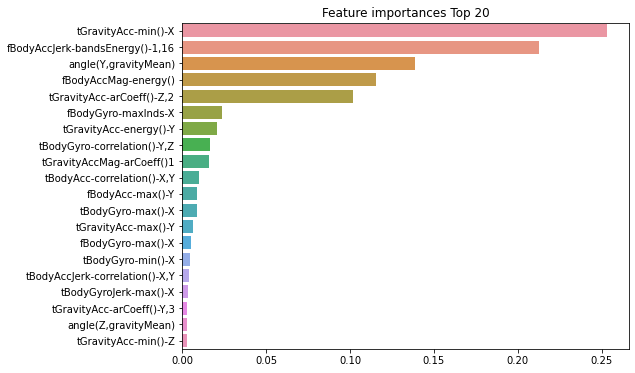

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# 정렬을 쉽게 하고 시본의 막대그래프로 쉽게 표현하기 위해 시리즈로 변환합니다.
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# **3. 앙상블 학습**

## **3.1. 앙상블 학습 개요**

**앙상블 학습(Ensemble Learning)**을 통한 분류는 여러 개의 분류기를 생성하고 그 예측 결과들을 결합하여 더 정확한 최종 예측을 도출하는 기법입니다. 정형 데이터 분류에 앙상블이 매우 뛰어난 성능을 보입니다. 대표적인 앙상블 알고리즘은 랜덤 포레스트와 그레이디언트 부스팅입니다. 특히 **XGBoost**와 **LightGBM**, **스태킹(Stacking)**은 대중적으로 널리 쓰입니다.

앙상블 학습의 방법은 **보팅(Voting)**, **배깅(Bagging)**, **부스팅(Boosting)**, 스태킹(Stacking)입니다.

보팅과 배깅은 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방법입니다. 다른 점이라면 보팅은 다른 알고리즘을 가진 분류기를 결합하고, 배깅은 같은 알고리즘을 가진 분류기를 결합하지만 데이터 샘플링만 서로 다르게 하면서 학습을 수행하여 보팅을 수행합니다. 대표적인 배깅 방식은 랜덤 포레스트입니다. 배깅에 대하여 첨언하자면, 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링하여 추출하는데, 이렇게 개별 분류기에게 데이터를 샘플링해서 추출하는 방식을 **부트스트래핑(Bootstrapping)** 분할 방식이라고 부릅니다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대하여 학습하고 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 배깅 방식입니다. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 달리 배깅은 중첩을 허용합니다. 예컨대 데이터 10,000개를 분류기 10개가 배깅으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있습니다.

부스팅은 여러 분류기가 순차적으로 학습하지만 앞에서 학습한 분류기가 예측이 틀린 데이터에 대하여는 올바르게 예측하도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행합니다. 가중치를 지속적으로 부스팅하면서 학습합니다.

스태킹은 여러 모델의 예측 결괏값을 다시 학습 데이터로 만들고 다른 모델(메타 모델)로 재학습시켜서 결과를 예측합니다. 

## **3.2. 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

**하드 보팅(Hard Voting)**을 이용한 분류는 다수결 원칙과 유사합니다. 예측한 결괏값들 중에 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정합니다.

**소프트 보팅(Soft Voting)**을 이용한 분류는 분류기들의 레이블 값 결정 확률을 모두 더하고 평균하여 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정합니다. 하드 보팅보다 성능이 좋아서 하드 보팅보다 더 많이 사용됩니다.

## **3.3. 보팅 분류기(voting classifier)**

`VotingClassifier` 클래스에 보팅 방식의 앙상블이 구현되어 있습니다. 이 클래스로 위스콘신 유방암 데이터 세트를 분석해 보겠습니다. 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들겠습니다. `VotingClassifier` 클래스는 주요 생성 인자인 `estimators`는 리스트 값으로 보팅에 사용될 여러 분류기 인스턴스를 튜플 형태로 입력 받습니다.

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델을 생성합니다.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기를 생성합니다.
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# 분류기를 학습시키고 예측하여 평가합니다.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델을 학습시키고 예측하여 평가합니다. 
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{} 정확도: {:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 더 높습니다. 물론 보팅으로 여러 분류기를 결합해도 성능이 무조건 향상되는 것은 아닙니다. 데이터 특성과 분포 등 같은 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 더 좋을 수도 있습니다. 그러나 앙상블 방법은 대개 단일 알고리즘보다 더 나은 예측 성능을 가지는 경우가 많습니다.

머신러닝 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 모델의 중요한 평가요소입니다. 이 관점에서 **편향-분산 트레이드오프**는 머신러닝 모델이 극복해야 할 중요한 과제입니다. 회귀 챕터에서 해당 개념을 다시 설명합니다.

# **4. 랜덤 포레스트**

## **4.1. 랜덤 포레스트 개요 및 실습**

랜덤 포레스트는 배깅의 대표적 알고리즘입니다. 비교적 빠른 수행 속도와 높은 예측 성능을 가집니다. 부트스트래핑 분할 방식으로 여러 개의 데이터 세트를 중첩되게 분리하여 각 분류기에 적용합니다.

위에서 사용한 사용자 행동 인식 데이터 세트를 랜덤 포레스트로 예측해 보겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()
rf_clf = RandomForestClassifier(max_depth=8, random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


## **4.2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

랜덤 포레스트의 하이퍼 파라미터는 결정 트리와 비슷합니다. 아래는 랜덤 포레스트의 하이퍼 파라미터 목록입니다.

- `n_estimators`: 결정 트리 개수를 지정합니다. 디폴트는 `10`입니다. 높은 수를 지정할수록 성능이 좋아지지만 무조건 좋아지는 것은 아니며 학습 시간이 오래 걸립니다.

- `max_features`: 결정 트리와 같습니다. 디폴트는 `auto`이며 `sqrt`입니다. 전체 피처가 16개이면 분할을 위해 4개만 참조합니다.

- `max_depth`, `min_samples_leaf`처럼 과적합을 개선하기 위해 조정하는 하이퍼 파라미터는 결정 트리와 동일합니다.

`GridSearchCV` 클래스를 사용하여 하이퍼 파라미터를 튜닝해 보겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


최적 하이퍼 파라미터로 `RandomForestClassifier`를 학습시키고 예측 성능을 측정해보겠습니다.

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=6,
                                min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'. format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


피처의 중요도를 시각화해보겠습니다.

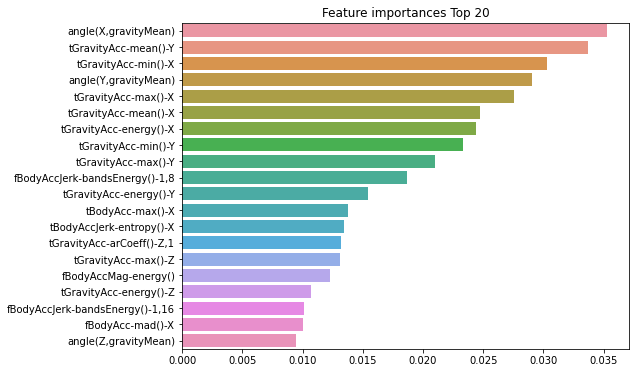

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# **5. GBM(Gradient Boosting Machine)**

## **5.1. GBM의 개요 및 실습**

부스팅 알고리즘은 여러 약한 학습기(weak learner)를 순차적으로 학습하고 예측하면서 잘못 예측한 데이터에 가중치를 부여하고 오류를 개선해 나가면서 학습하는 방식입니다. 대표적인 부스팅 방법은 **에이다부스트(Adaboost, Adaptive boosting)**와 **그레이디언트 부스트**입니다. 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅을 수행합니다. 아래는 에이다부스트가 학습하는 방법을 도식화한 그림입니다.

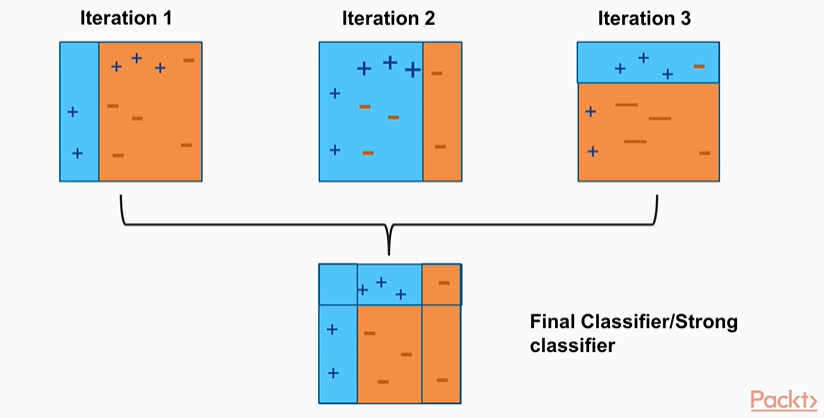

+와 -로 된 피처 데이터 세트입니다. 여러 약한 학습기가 잘못 분류된 피처에 가중치를 부여하면서(그림상 기호 크기가 커짐) 약한 학습기를 결합한 최종 결과 예측을 도출합니다. 예컨대 첫 번째 학습기에 가중치를 0.3, 두 번째 학습기에 가중치를 0.5, 세 번째 학습기에 가중치를 0.8만큼 부여하고 모두 결합하여 예측을 수행합니다.

**GBM(Gradient Boosting Machine)**은 가중치 업데이트를 **경사 하강법(Gradient Descent)**으로 적용합니다. 오류 값은 실젯값 - 예측값입니다. 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법입니다. GBM을 기반으로 수많은 알고리즘이 새로 만들어지고 있습니다.

GBM을 사용하여 사용자 행동 데이터 세트를 예측 분류해 보겠습니다. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 827.6


랜덤 포레스트의 예측 성능보다 좋습니다. 대개 GBM이 랜덤 포레스트보다 예측 성능이 좋습니다. 다만 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝에도 더 공을 들여야 합니다.

## **5.2. GBM 하이퍼 파라미터 소개**

GBM의 하이퍼 파라미터는 아래와 같습니다. `max_depth`, `max_features`에 대한 설명은 생략합니다.

- `n_estimators`: 약한 학습기 개수를 지정합니다. 디폴트는 `100`입니다. 개수가 많을수록 예측 성능이 일정 수준까지는 좋아지지만 시간이 오래 걸립니다.

- `loss`: 경사 하강법에서 사용할 비용 함수를 지정합니다.

- `learning_rate`: GBM이 학습을 수행할 때마다 적용하는 학습률입니다. 약한 학습기가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수입니다. 디폴트는 `0.1`이며 0 ~ 1 사잇값을 지정할 수 있습니다. 꽤 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아내므로 예측 성능이 높아질 가능성이 높습니다. 다만 많은 약한 학습기는 순차적인 반복이 필요하기 때문에 수행 시간이 오래 걸리고 반복이 완료되어도 최소 오류 값을 찾지 못할 수도 있습니다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려서 예측 성능이 떨어질 가능성이 높지만 빠른 수행이 가능합니다. 이런 특성 때문에 `n_estimators`와 상호 보완적으로 조합하여 사용합니다. `learning_late`를 작게 하고 `n_estimators`를 크게 하면 성능이 좋아지지 않는 한계점까지는 약간씩이나 예측 성능을 제고할 수 있습니다. 

- `subsample`: 약한 학습기가 학습에 사용하는 데이터 샘플링의 비율입니다. 디폴트는 `1`이며 전체 학습 데이터를 기반으로 학습합니다. 과적합을 낮추려면 작은 값으로 지정합니다.

그리드 서치로 하이퍼 파라미터 최적화를 수행해 보겠습니다. 오랜 시간이 소요되므로 하이퍼 파라미터를 낮은 수치만으로 제약하겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


테스트 세트에 적용하여 예측 정확도를 확인하겠습니다.

In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


GBM은 과적합도 잘 제어하는 편입니다.

# **6. XGBoost(eXtra Gradient Boost)**

## **6.1. XGBoost 개요**

**XGBoost**는 대중적으로 널리 쓰이는 알고리즘 중 하나입니다. GBM에 기반하면서도 느린 수행 시간과 과적합 규제(Regularization) 부재 등의 문제를 해결한 알고리즘입니다. 병렬 CPU 환경에서 병렬 학습이 가능하여 GBM보다 더 빠릅니다.

일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더이상 수행하지 않지만 자칫 지나치게 많은 분할이 발생할 수 있습니다. 마찬가지로 XGBoost도 `max_depth` 파라미터로 분할 깊이를 조정하기도 하지만 나무 가지치기(Tree pruning)로 긍정 이득이 없는 분할을 가지치기하여 분할 수를 더 줄입니다.

아울러 XGBoost는 반복 수행 시마다 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행하여 최적화된 반복 수행 횟수를 가질 수 있습니다. 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있도록 조기 중단(early stopping) 합니다. 결측치를 자체적으로 처리할 수도 있습니다.

## **6.2. XGBoost 설치하기**

생략합니다.

## **6.3. 파이썬 래퍼 XGBoost 하이퍼 파라미터**

본래 XGBoost는 C/C++로 개발되었고 파이썬과 사이킷런으로도 구동할 수 있도록 두 가지 래퍼 클래스(Wrapper Class)를 추가로 제공합니다. 파이썬 전용 래퍼 클래스와 사이킷런 전용 래퍼 클래스입니다. 파이썬 래퍼 클래스는 잘 쓰이지 않으므로 생략하고 넘어가겠습니다. 자세한 내용은 서적을 참고하시기 바랍니다.

## **6.4. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

생략합니다.

## **6.5. 사이킷런 래퍼 XGBoost의 개요 및 적용**

In [ ]:
import xgboost
from xgboost import XGBClassifier

print(xgboost.__version__)

0.90


위스콘신 유방암 데이터 세트를 활용하여 XGBoost를 적용해보겠습니다. 먼저 데이터를 준비하겠습니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


악성은 0, 양성은 1입니다.

데이터 세트의 80%를 학습 데이터 세트로 나누고, 20%를 테스트 데이터 세트로 나누겠습니다. 그리고 이 학습 데이터 세트에서 90%를 최종 학습 데이터 세트로 나누고, 10%를 검증 데이터 세트로 나누겠습니다. 검증 데이터 세트로 나누는 이유는 XGBoost의 기능인 검증 성능 평과와 조기 중단을 수행하기 위해서입니다. `cancer_df`의 맨 마지막 칼럼이 레이블이므로 피처용 데이터프레임은 `cancer_df`의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 `:-1` 슬라이싱을 사용해 추출하겠습니다.

In [ ]:
# `cancer_df`에서 피처용 데이터프레임과 레이블용 시리즈 객체를 추출합니다.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 80%는 학습 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)

# `X_train`과 `y_train`을 90%는 학습 데이터, 10%는 검증 데이터로 나눕니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecat

`XGBClassifier`, `XGBRegressor` 클래스의 주요 파라미터는 아래와 같습니다.

- 일반 파라미터(디폴트 값을 거의 바꾸지 않음)

 - `booster`: 트리 기반 모델(`gbtree`) 또는 선형 모델(`gblinear`)입니다. 디폴트는 `gbtree`입니다.

 - `silent`: 출력 메시지를 나타낼지 여부입니다. 디폴트는 `None`이며 출력 메시지를 나타냅니다.

 - `n_jobs` CPU의 실행 스레드 개수를 조정합니다. 디폴트는 `1`이며 전체 스레드를 사용합니다. 

- 부스터 파라미터(트리 최적화, 부스팅, 규제 등)

 - `learning_rate`: GBM과 같은 학습률입니다. 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값입니다. 0 ~ 1 사잇값이며 디폴트는 `0.1`입니다. 선호되는 값은 0.01 ~ 0.2입니다.

 - `n_estimators`: GBM과 같습니다.

 - `min_child_weight`: 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합입니다. 값이 클수록 분할을 자제하며, 과적합을 조절하는 데 사용합니다. 디폴트는 `1`입니다. 

 - `gamma`: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값입니다. 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리하며, 값이 클수록 과적합이 감소합니다. 디폴트는 `0`입니다.

 - `max_depth`: 트리 기반 알고리즘과 같습니다. 디폴트는 `6`입니다. 값이 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통 3 ~ 10 사잇값을 적용합니다. 

 - `subsample`: GBM과 같습니다. 디폴트는 `1`입니다.

 - `colsample_bytree`: GBM의 `max_features`와 유사합니다. 트리 생성에 필요한 피처를 임의로 샘플링 하는 데 사용됩니다. 피처가 매우 많은 경우 과적합을 조정하는 용도입니다. 디폴트는 `1`입니다.

 - `reg_lambda`: L2 규제 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합을 감소시킬 수 있습니다. 디폴트는 `1`로 우선 적용되는 것을 의미합니다.

 - `reg_alpha`: L1 규제 적용 값입니다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합을 감소시킬 수 있습니다. 디폴트는 `0`으로 우선 적용되지 않는 것을 의미합니다.

 - `scale_pos_weight`: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터입니다. 디폴트는 `1`입니다.

- 학습 태스크 파라미터(학습 수행 시의 객체 함수, 평가를 위한 지표 등)

 - `objective`: 최솟값을 가져야할 손실 함수입니다. 이진 분류와 다중 분류에 따라 달라집니다. `'binary:logistic'`은 이진 분류, `multi:softmax`는 다중 분류일 때 적용합니다. `multi:softmax`의 경우 레이블 클래스 개수인 `num_class` 파라미터를 지정해야 합니다. `'multi:softprob'`는 `multi:softmax`와 유사하지만 개별 레이블 클래스의 해당되는 예측 확률을 반환합니다.

 - `eval_metric`: 검증에 사용할 함수입니다. 디폴트는 회귀는 `rmse`, 분류는 `error`입니다.

   - `rmse`: Root Mean Squeare Error

   - `mae`: Mean Absolute Error
 
   - `logloss`: Negative log-likelihood

   - `error`: Binary classification error rate (0.5 threshold)

   - `merror`: Multiclass classification error rate

   - `mlogloss`: Multiclass logloss

   - `auc`: Area under the curve

뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적습니다. 아울러 튜닝을 하더라도 효과가 적은 것이 대부분입니다. 튜닝하는 경우는 피처 수가 매우 많거나 피처 간 상관되는 정도가 많거나 데이터 세트에 따라 여러 가지 특성이 있을 수 있습니다.

과적합을 제어하려면 아래 방법을 적용할 수 있습니다.

- `learning_rate` 값을 0.01 ~ 0.1로 낮추고 `n_estimators` 값을 높입니다.

- `max_depth` 값을 낮춥니다.

- `min_child_weight` 값을 높입니다.

- `gamma` 값을 높입니다.

- `subsample` 값과 `colsample_bytree` 값을 조정합니다.

학습과 예측을 수행하겠습니다. 아울러 이전 챕터에서 선언했던 `get_clf_eval()` 함수를 호출하여 모델의 예측 성능을 평가하겠습니다.

In [ ]:
# Warning 메시지가 뜨지 않도록 `eval_matric` 파라미터에 XGBClassifier 생성 인자를 전달합니다.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744,    AUC: 0.9954


위스콘신 데이터 세트 크기가 작기 때문에 전반적으로 검증 데이터를 나누거나 교차 검증 등을 적용하면 성능 수치가 불안정해집니다. 반면 데이터 세트 크기가 크면 원본 학습 데이터를 다시 학습 데이터와 검증 데이터로 분리하고 조기 중단 회수를 적절하게 부여했을 때 일반적으로 과적합이 개선되고 모델 성능을 조금 향상시킬 수 있습니다.

조기 중단을 수행하려면 `fit()` 메서드가 가진 파라미터에 인자를 지정해야 합니다. 아래는 조기 중단 관련 파라미터 목록입니다.

- `early_stopping_rounds`: 평가 지표가 향상될 수 있는 반복 횟수입니다.

- `eval_metric`: 조기 중단을 위한 평가 지표입니다.

- `eval_set`: 성능 평가를 수행할 데이터 세트입니다.

이번엔 조기 중단을 수행해 보겠습니다. 최초 학습 데이터에서 나눈 최종 학습 데이터 세트와 검증 데이터 세트를 이용하여 학습과 조기 중단을 적용해 보겠습니다. 

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13

`n_estimators`를 `400`으로 지정하여 400번 반복하게 했지만 176번만 반복하고 학습을 완료했습니다. 126번 반복 시 logloss가 0.255869이고 176번 반복 시 0.261032인데, 126번에서 176번까지 `early_stopping_rounds=50`으로 지정된 5번의 반복 학습을 수행하는 동안 성능 평가 지수가 향상되지 않았기 때문에 반복을 멈춘 것입니다.

조기 중단으로 학습된 모델의 예측 성능을 확인하겠습니다.

In [ ]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677,    AUC: 0.9933


성능이 약간 떨어졌습니다.

`early_stopping_rounds` 파라미터의 값을 `10`으로 내려보겠습니다.

In [ ]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss',
                eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13

조기 중단으로 학습된 모델의 예측 성능을 확인하겠습니다.

In [ ]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1: 0.9610,    AUC: 0.9933


성능이 더 떨어졌습니다. 이처럼 조기 중단값을 급격하게 줄이면 예측 성능이 저하될 수 있습니다. 성능이 향상될 여지가 있지만 10번 반복하는 동안 성능 평가 지표가 향상되지 않아서 반복을 멈추고 학습을 충분하게 수행하지 못하여 예측 성능이 저하되는 것입니다.

`plot_importance()` 메서드를 사용하여 피처 중요도를 시각화해보겠습니다.

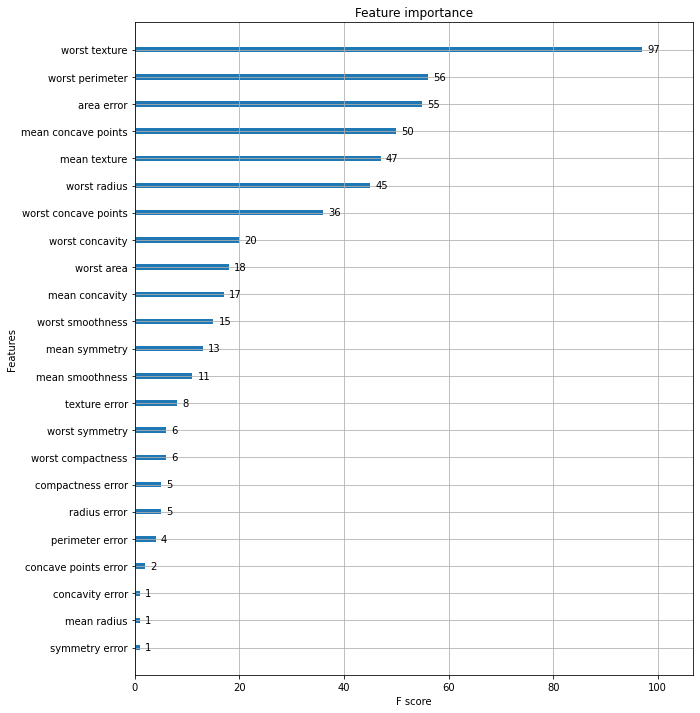

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.show()

기본 평가 지표는 f1 스코어가 기반입니다.

# **7. LightGBM**

**LightGBM**은 각광을 받고 있는 부스팅 계열 알고리즘입니다. XGBoost보다 학습 시간과 예측 시간이 빠르고 더 작은 메모리를 사용합니다. 아울러 원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 노드를 분할합니다. 대용량 데이터에 대한 뛰어난 예측 성능을 발휘하고 병렬 컴퓨팅 기능과 GPU를 제공합니다. 다만 일반적으로 10,000건 이하의 적은 데이터 세트에 적용하면 과적합이 발생하기 쉽습니다.

LightGBM은 일반 GBM 계열의 트리 분할 방법인 **균형 트리 분할(Level Wise)**과 달리 **리프 중심 트리 분할(Leaf Wise)** 방식을 사용합니다. 균형 트리 분할은 최대한 균형 잡힌 트리를 유지하면서 분할하므로 트리 깊이를 최소화할 수 있습니다. 균형 잡힌 트리는 오버피팅에 더 강하지만 시간이 오래 걸립니다. 반면 LightGBM이 사용하는 리프 중심 트리 분할은 트리 균형을 맞추지 않고 **최대 손실 값(max delta loss)**을 가지는 리프 노드를 지속적으로 분할하면서 비대칭하고 깊이가 깊은 트리를 만듭니다. 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있습니다.

## **7.1. LightGBM 설치**

생략합니다.

## **7.2. LightGBM 하이퍼 파라미터**

In [ ]:
import lightgbm

print(lightgbm.__version__)

2.2.3


In [ ]:
from lightgbm import LGBMClassifier

help(LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split', **kwargs)
 |  
 |  LightGBM classifier.
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric=None, early_stopping_rounds=None, verbose=True, feature_name='auto', cate

LightGBM의 하이퍼 파라미터는 XGBoost와 비슷합니다. 다만 LightGBM은 리프 노드가 계속 분할되면서 트리가 깊어지므로 하이퍼 파라미터를 조금 다르게 지정해야 합니다. 에컨대 `max_depth` 값이 매우 큽니다. 파라미터 목록은 아래와 같습니다.

- 주요 파라미터

 - `n_estimators`: 반복 수행하려는 트리 개수입니다. 크게 지정하면 예측 성능이 높을 수 있지만 지나치면 과적합이 발생합니다. 디폴트는 `100`입니다.

 - `learning rate`: 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률이며 0 ~ 1 사잇값입니다. 일반적으로 `n_estimators`를 크게 하고 `learning rate`를 작게 하면 예측 성능이 향상되지만 과적합 되거나 학습 시간이 오래 걸립니다. XGBoost과 동일한 파라미터입니다. 디폴트는 `0.1`입니다.

 - `max_depth`: 트리 기반 알고리즘과 같습니다. 0보다 작은 값을 지정하면 깊이에 제한이 없습니다. 디폴트는 `-1`입니다.

 - `min_child_samples`: 최종 결정 클래스인 리프 노드가 되기 위해 최소한으로 필요한 레코드 수이며 결정 트리의 `min_samples_leaf`와 같습니다. 과적합을 제어하는 데 쓰입니다. 디폴트는 `20`입니다.

 - `num_leaves`: 트리 하나가 가질 수 있는 최대 리프 개수입니다. 디폴트는 `31`입니다.

 - `boosting`: 부스팅 트리를 생성하는 알고리즘을 기술합니다. 지정할 수 있는 값은 아래 2가지입니다.

   - `gbdt`: 일반적인 그레이디언트 부스팅 결정 트리이며 디폴트입니다.

   - `rf`: 랜덤 포레스트입니다.

 - `subsample`: 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율입니다. XGBoost와 동일합니다.

 - `colsample_bytree`: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율입니다. 과적합 방지에 사용됩니다. GBM의 `max_features`와 유사하고 XGBoost의 `colsample_bytree`와 동일합니다. 디폴트는 `

 - `reg_lambda`: L2 규제 제어를 위한 값입니다. XGBoost와 동일합니다. 디폴트는 `0.0`입니다.

 - `reg_alpha`: L1 규제 제어를 위한 값입니다. XGBoost와 동일합니다. 디폴트는 `0.0`입니다.

- 학습 태스크 파라미터

 - `objective`: 최솟값을 가져야 할 손실함수입니다. XGBoost와 같습니다.

## **7.3. 하이퍼 파라미터 튜닝 방안**

기본 튜닝 방안은 `num_leaves` 개수를 중심으로 `min_child_samples`와 `max_depth`를 함께 조정하면서 모델 복잡도를 줄여갑니다.

- `num_leaves`는 개별 트리가 가질 수 있는 최대 리프 개수이고 모델 복잡도를 제어하는 주요 파라미터입니다. 일반적으로 개수를 높이면 정확도가 높아지지만 트리가 깊어지고 모델 복잡도가 커져서 과적합 영향도도 커집니다. 

- `min_child_samples`: 과적합을 개선하는 데 중요한 역할을 합니다. `num_leaves`와 학습 데이터에 따라 달라지지만 보통 큰 값일수록 트리가 깊어지지 않게 합니다.

- `max_depth`: 트리 깊이를 제한합니다.

일반적인 부스팅 계열 튜닝인 `learning_rate`를 작게 하면서 `n_estimators`를 크게 하는 방법도 적용 가능합니다. 다만 `n_estimators`가 너무 크면 과적합이 발생합니다.

`reg_lambda`, `reg_alpha`로 규제를 바꾸거나, 학습 데이터에 사용할 피처 개수나 데이터 샘플링 레코드 수를 줄이기 위해 `colsample_bytree`, `subsample`을 조정할 수도 있습니다.

## **7.4. 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**

생략합니다.

## **7.5. LightGBM 적용 - 위스콘신 유방암 예측**

데이터를 준비하고 위 파트의 모든 과정을 LightGBM으로 수행하겠습니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중에 80%는 학습 데이터, 20%는 테스트용 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 학습 데이터를 90% 학습 데이터, 10% 검증 데이터로 나눕니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.588173	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	training's binary_loglos

110번까지만 반복하고 조기 중단으로 멈췄습니다.

예측 성능을 확인하겠습니다.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677,    AUC: 0.9888


XGBoost보다 약간 낮지만 학습 데이터 세트와 테스트 데이터 세트 크기가 작아서 성능 비교는 큰 의미가 없습니다.

피처 중요도를 시각화해보겠습니다.

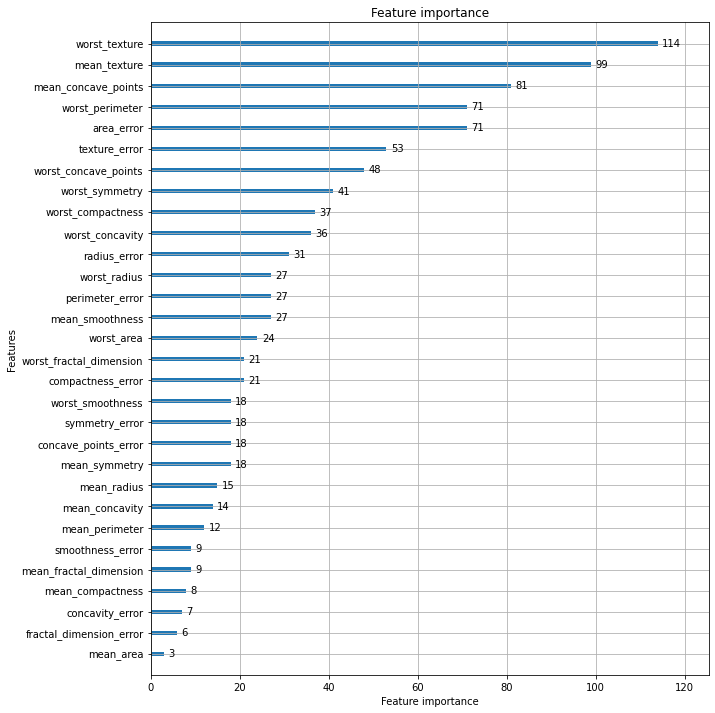

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

# **8. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**

그리드서치(GridSearch)의 단점은 튜닝할 하이퍼 파라미터 개수가 많으면 최적화 수행 시간이 오래 걸리는 것입니다. 더욱이 하이퍼 파라미터 값 범위가 넓거나 학습 데이터 크기가 크면 최적화 수행 시간이 훨씬 더 오래 걸립니다.

XGBoost나 LightGBM은 하이퍼 파라미터를 튜닝하지 않고도 뛰어난 성능을 발휘하지만 하이퍼 파라미터 개수가 다른 알고리즘보다 많은 편입니다. 그리드서치로 이 알고리즘들의 최적 하이퍼 파라미터를 찾으려면 매우 오랜 시간이 필요합니다. **베이지안 최적화** 기법은 그리드서치의 단점을 보완하는 방식입니다.

## **8.1. 베이지안 최적화 개요**

**베이지안 최적화** 기법은 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식입니다. 먼저 아래 특정 함수 식을 알고 있다고 가정하겠습니다.

$$f(x, y) = 2x - 3y$$

베이지안 최적화는 $f(x, y)$의 반환 값을 최대/최소로 하는 $x$, $y$ 값을 찾아내는 것입니다. 위 함수 식은 간단해서 반환 값을 쉽게 찾을 수 있습니다. $x$가 클수록($x$ 범위가 0~1000이라면 1000) $y$는 최대 값을 반환합니다.

다만 함수 식 자체를 알 수 없을 뿐더러 입력값과 반환값만 알 수 있다면 함수 반환값의 최대/최소 값을 찾기 어렵습니다. 위 함수 식처럼 간단하면 여러 번 입력값을 대입해서 최대/최소를 찾을 수 있겠지만 함수 식이 복잡하고 입력값 개수가 많거나 범위가 넓으면 결코 쉽지 않습니다. 이런 함수 식에는 베이지안 최적화를 적용하여 최적 입력값을 찾을 수 있습니다.

베이지안 최적화는 **베이지안 확률**에 기반을 둔 기법입니다. 베이지안 확률이 새 사건이나 새 샘플 데이터를 기반으로 사후 확률을 개선하는 것처럼 베이지안 최적화는 새 데이터를 입력받으면 최적 함수를 예측하는 사후 모델을 개선하면서 최적 함수 모델을 생성합니다.

베이지안 최적화를 구성하는 두 요소는 **대체 모델(Surrogate Model)**과 **획득 함수(Acquisition Function)**입니다. 대체 모델은 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤에 이를 기반으로 최적 함수 모델을 개선합니다. 획득 함수는 개선된 대체 모델을 기반으로 최적 입력값을 계산합니다. 베이지안 최적화를 하이퍼 파라미터 튜닝에 사용할 때 입력값은 하이퍼 파라미터를 의미합니다. 정리하자면, 대체 모델은 획득 함수가 계산한 하이퍼 파라미터를 입력받으면서 점차 개선되고, 획득 함수는 개선된 대체 모델을 기반으로 더 정확한 하이퍼 파라미터를 계산합니다.

베이지안 최적화는 아래 단계를 따릅니다. 본서에서는 그래프를 함께 제시하므로 자세한 내용은 본서를 참고하시기 바랍니다.

1. 처음에는 하이퍼 파라미터들을 무작위로 샘플링하고 성능 결과를 관측합니다. 

1. 대체 모델은 관측된 값을 기반으로 최적 함수를 추정합니다.

1.  획득 함수는 추정된 최적 함수를 기반으로 다음으로 관측할 하이퍼 파라미터 값을 계산합니다. 획득 함수는 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달합니다.

1. 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되고 다시 최적 함수를 예측 추정합니다.

위 과정 중 3과 4를 특정 횟수만큼 반복하면 대체 모델의 불확실성이 개선되면서 점차 정확한 최적 함수를 추정합니다.

대체 모델은 최적 함수를 추정할 때 다양한 알고리즘을 사용합니다. 일반적으로는 **가우시안 프로세스(Gaussian Process)**를 적용합니다. 다만 아래 파트에서는 **트리 파르젠 Estimator(TPE, Tree-structure Parzen Estimator)**를 사용합니다.

## **8.2. HyperOpt 사용하기**

베이지안 최적화와 관련된 패키지는 **HyperOpt**, **Bayesian Optimization**, **Optuna** 등입니다. 이 패키지들의 사용법은 서로 비슷합니다. 이 파트에서는 HyperOpt를 사용해 보겠습니다. 사용법은 [링크](https://github.com/hyperopt/hyperopt)를 참고하시기 바랍니다.

먼저 HyperOpt를 설치하겠습니다.

In [ ]:
!pip install -U hyperopt

Note: you may need to restart the kernel to use updated packages.


`hp` 모듈을 사용하여 입력 변수명과 입력값의 검색 공간을 설정해 보겠습니다. 입력 변수명과 입력값 검색 공간은 딕셔너리 형태로 설정하는데 키 값으로는 입력 변수명, 밸류 값으로는 해당 입력 변수의 검색 공간을 입력합니다. `hp` 모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러 함수를 제공합니다. 먼저 아래 코드를 실행하고 설명을 이어가겠습니다. 입력 변수 x, y에 대한 입력값 검색 공간을 지정한 코드입니다.

In [ ]:
from hyperopt import hp

search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}


`hp.quniform('x', -10, 10, 1)`는 입력 변수 x가 -10부터 10까지 1의 간격을 가진 값들(-10, -9, ..., 9, 10)을 의미합니다. y도 같은 원리입니다. 다만 이 값들이 순차적으로 입력되는 것은 아닙니다.

입력값의 검색 공간을 제공하는 대표 메서드들의 목록을 제시하겠습니다. 먼저 함수에 인자로 들어가는 목록을 나열하겠습니다.

- `label`: 입력 변수명입니다.

- `low`: 최솟값입니다.

- `high`: 최댓값입니다.

- `q`: 간격입니다.

아래는 메서드들의 목록입니다.

- `quniform(label, low, high, q)`: `label`로 지정된 입력값 변수 검색 공간을 최솟값 `low`부터 최댓값 `high`까지 간격 `q`를 가지고 설정합니다.

- `uniform(label, low, high)`: 최솟값 `low`부터 최댓값 `high`까지 정규 분포 형태의 검색 공간을 설정합니다.

- `randint(label, upper)`: 0부터 최댓값 `upper`까지 무작위한 정숫값으로 검색 공간을 설정합니다.

- `loguniform(label, low, high)`: `exp(uniform(low, high)` 값을 반환하며, 반환한 값의 log로 변환된 값은 정규 분포 형태를 가지는 검색 공간을 설정합니다.

- `choice(label, options)`: 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 때 설정합니다. `options`는 리스트나 튜플 형태이며 예컨대 `hp.choice('tree criterion', ['gini', 'entrophy'])`로 설정하면 입력 변수 `tree_criterion`의 값을 `'gini'`와 `'entrophy'`로 설정하여 입력합니다.

이제 목적 함수를 생성해 보겠습니다. 목적 함수는 변숫값과 검색 공간을 가지는 딕셔너리를 인자로 받고 특정 값을 반환하는 구조로 생성해야 합니다. 위에서 생성한 객체인 `search_space`를 사용하여 코드로 구현하고 설명을 이어가겠습니다.

In [ ]:
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

`search_space`로 지정된 딕셔너리에서 x 입력 변숫값과 y 입력 변숫값을 추출하여 `x**2 - 20*y`로 계산된 값을 반환하는 목적 함수입니다. 목적 함수의 반환값은 숫자형 단일값뿐만 아니라 딕셔너리 형태로도 반환할 수 있습니다.

이렇게 입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환값이 최소가 될 수 있는 최적 입력값을 베이지안 최적화 기법에 기반하여 찾아야 합니다. 이를 위해 `fmin(fn, space, algo, max_evals, trials, rstate)` 메서드를 사용할 수 있습니다. 관련 인자는 아래와 같습니다.

- `fn`: 위에서 선언한 `objective_func`와 같은 목적 함수입니다.

- `space`: 위에서 생성한 `search_space`와 같은 검색 공간 딕셔너리입니다.

- `algo`: 베이지안 최적화 적용 알고리즘입니다. 기본적으로 HyperOpt의 기본 최적화 알고리즘인 TPE(Tree of Parzen Estimator)인 `tpe.suggest`입니다.

- `max_evals`: 최적 입력값을 찾기 위한 입력값 시도 횟수입니다.

- `trial`: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용됩니다. `Trial` 클래스를 인스턴스로 선언한 변수명을 입력합니다.

- `rstate`: 메서드를 수행할 때마다 동일한 결괏값을 가지도록 설정하는 랜덤 시드(seed) 값입니다.

위에서 설정한 검색 공간인 `search_space`에서 목적 함수 `object_func`의 최솟값을 반환하는 최적 입력 변숫값을 찾도록 베이지안 최적화를 수행해 보겠습니다. 먼저 코드를 제시하겠습니다.

In [ ]:
import numpy as np
from hyperopt import fmin, tpe, Trials

# 입력 결괏값을 저장한 `Trials`의 인스턴스를 선언합니다.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 입력값을 5번 시도하는 것으로 찾아냅니다.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 625.40trial/s, best loss: -224.0]
best {'x': -4.0, 'y': 12.0}


입력 변수 x의 공간 -10 ~ 10, y의 공간 -15 ~ 15에서 목적 함수의 반환값을 x**2 - 20*y, 즉 (x$^2$-20y)로 설정했으므로 x는 0에 가장 가까울수록, y는 15에 가까울수록 반환값이 최소로 근사됩니다. 만족할 정도의 최적 x와 y 값을 찾은 것은 아니지만 5번 반복하여 최적값에 가까워질 수 있었습니다.

이번엔 `max_evals=20`으로 지정하여 최적값을 확인해 보겠습니다.

In [ ]:
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 714.68trial/s, best loss: -296.0]
best {'x': 2.0, 'y': 15.0}


20번 반복하여 최적 최솟값을 근사할 수 있는 결과를 얻었습니다. 완벽한 정답인 x=0은 아니지만 입력값 x가 -10 ~ 10까지 21개의 경우의 수, 입력값 y가 -15 ~ 15까지 31개의 경우의 수를 가질 수 있으므로 그리드 서치처럼 순차적으로 x와 y 변숫값을 입력하여 최소 함수 반환값을 찾는다면 최대 21 * 31 = 651회만큼 반복해야 하지만 베이지안 최적화를 이용하면 20회만 반복해도 일정 수준의 최적값을 근사할 수 있습니다. 그리드 서치와 같은 방식에서 좀 더 정교화된 알고리즘을 추가하면 반복 수치를 줄일 수 있겠지만 위에서 사용한 베이지안 최적화 방식이 그리드 서치 방식보다 최적 값 탐색 시간을 줄여준다는 사실은 확실합니다.

`fmin()` 메서드를 수행할 때 인자로 지정되는 `Trial` 클래스의 인스턴스는 함수가 반복하여 수행할 때마다 입력되는 변숫값들과 함수 반환값을 속성을 가집니다. 이 인스턴스의 주요 속성은 `results`와 `vals`입니다. `results` 속성은 함수가 반복하여 수행할 때마다 반환되는 반환값을 가지고, `vals` 속성은 함수가 반복하여 수행할 때마다 입력되는 입력 변숫값을 가집니다. 먼저 `results` 속성을 확인해 보겠습니다.

In [ ]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}]


리스트의 개별 원소는 `{'loss':함수 반환값, 'status':반환 상태값}`의 딕셔너리 형태입니다. 20회만큼 반복했으므로 각각 딕셔너리 20개를 개별 원소로 가집니다.

`vals` 속성을 확인해 보겠습니다.

In [ ]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, -6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0]}


`{'입력변수명': 개별적으로 수행할 때마다 입력된 값}`의 딕셔너리 내 리스트 형태입니다.

다만 이 두 속성만으로는 최적화 경과를 직관적으로 확인하기 어렵습니다. 데이터프레임으로 생성하여 확인해 보겠습니다.

In [ ]:
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losess': losses})
result_df

,x,y,losess
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,-6.0,5.0,-64.0
6,-4.0,10.0,-184.0
7,4.0,-2.0,56.0
8,-4.0,12.0,-224.0
9,9.0,1.0,61.0


## **8.3. HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화**

HyperOpt를 사용하여 XGBoost의 하이퍼 파라미터를 최적화해 보겠습니다. 방법은 간단합니다. 적용해야 할 하이퍼 파라미터와 검색 공간을 설정하고, 목적 함수에서 XGBoost를 학습한 뒤에 예측 성능 결과를 반환값으로 설정합니다. 그리고 `fmin()` 메서드에서 목적 함수를 하이퍼 파라미터 검색 공간의 입력값들을 사용하여 최적 예측 성능 결과를 도출하는 최적 입력값들을 결정합니다.

다만 두 가지 유의할 점이 있습니다. 첫째, 정숫값만 입력받는 하이퍼 파라미터가 있지만 HyperOpt는 입력값과 반환값 모두 실수형이므로 하이퍼 파라미터를 입력할 때 형변환을 수행해야 합니다. 둘째, HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하므로 성능 값이 클수록 좋은 성능 지표의 경우는 -1을 곱해야 합니다. 아래에서 설명을 이어가겠습니다.

위스콘신 유방암 데이터 세트를 다시 로딩해서 학습/검증/테스트 데이터로 분리하겠습니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중에 80%는 학습 데이터, 20%는 테스트용 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 학습 데이터를 90% 학습 데이터, 10% 검증 데이터로 나눕니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

하이퍼 파라미터의 검색 공간을 설정하겠습니다.

In [ ]:
from hyperopt import hp

# 정규 분포된 값으로 검색하며,
# `max_depth`와 `min_child_weight`는 정수형 파라미터이므로 `quniform()` 메서드를 사용하고
# `colsample_bytree`와 `learning_rate`는 실수형 파라미터이므로 `uniform()` 메서드를 사용합니다. 
xgb_search_space = {
                    'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
                    }

목적 함수를 설정하겠습니다. 하이퍼 파라미터 튜닝을 위한 목적 함수는 검색 공간에서 설정한 하이퍼 파라미터들을 입력받아서 XGBoost를 학습하고 평가지표를 반환하도록 구성합니다. 유의할 사항은 두 가지입니다.

첫째, 검색 공간에서 목적 함수로 입력되는 모든 인자는 실수형 값이므로 `XGBoostClassifier`의 정수형 하이퍼 파라미터 값으로 설정할 경우 정수형으로 형변환을 수행해야 합니다. 예컨대 `hp.quniform('max_depth', 5, 20, 1)`를 적용했을 때 검색되는 값은 `[5, 6, 7, ...]`이 아니라 `[5.0, 6.0, 7.0, ...]`처럼 실수형 값이 입력됩니다. 따라서 반드시 `max_depth=int(search_space['max_depth'])`처럼 정수형으로 형 변환을 수행해야 합니다.

둘째, HyperOpt의 목적 함수는 최솟값을 반환하도록 최적화해야 하므로 정확도처럼 값이 클수록 좋은 성능 지표라면 -1을 곱하고 반환하여 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어야 합니다. 예컨대 목적 함수의 반환값을 정확도로 한다면 정확도는 값이 클수록 좋은 성능 지표이므로 0.8(80%)보다 0.9(90%)가 더 좋은 지표입니다. 그러나 `fmin()` 메서드는 최솟값을 최적화하므로 0.8을 더 좋은 최적화로 여깁니다. 따라서 정확도에 -1을 곱하면 -0.8보다 -0.9가 더 작은 값이 되어 `fmin()` 메서드는 -0.9를 더 좋은 최적화로 여기게 됩니다. 별개로 회귀의 성능 지표인 MAE나 RMSE는 값이 작을수록 좋으므로 -1을 곱하지 않아도 됩니다.

두 유의사항을 고려하여 목적 함수인 `objective_func()` 함수를 선언해 보겠습니다. 목적 함수의 반환값은 교차 검증 기반의 평균 정확도를 사용하겠습니다. 교차 검증 세트 3개로 정확도를 반환하도록 `cross_val_score()` 메서드를 적용하되 수행 시간을 절약할 목적으로 `n_estimator=100`을 지정하겠습니다. 참고로 `cross_val_score()` 메서드는 XGBoost와 LightGBM에 적용할 때 조기 중단이 지원되지 않습니다. 조기 중단을 수행하려면 KFold 클래스를 사용하여 학습/검증 데이터 세트를 만들어서 직접 교차 검증을 수행해야 합니다. 아래 예제인 산탄데르 고객 만족 예측 실습에서 이를 구현해 볼 예정입니다.

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # `accuracy`는 `cv=3` 개수만큼 roc-auc 결과를 리스트로 갖습니다. 이 값을 평균하여 -1을 곱합니다.
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}

`fmin()` 메서드를 사용하여 최적 하이퍼 파라미터를 도출해 보겠습니다.

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50,
           trials=trial_val,
           rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:07<00:00,  6.31trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


정수형 하이퍼 파라미터가 실수형으로 출력됐습니다. 

최적 하이퍼 파라미터를 적용하기 전에 정수형 하이퍼 파라미터는 정수형으로 형 변환을 수행하고 실수형 하이퍼 파라미터는 소수점 5자리까지 변환하겠습니다.

In [ ]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
                        round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
                        int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.54241, learning_rate:0.12601, max_depth:17, min_child_weight:2


최적 하이퍼 파라미터를 적용하여 다시 학습시키고 성능 평가 결과를 도출해 보겠습니다. XGBoost의 조기 중단은 검증 데이터 세트로 활용하고 `n_estimators=400`으로 지정하겠습니다. 성능 평가는 위에서 선언했던 `get_clf_eval()` 함수를 이용하여 도출하겠습니다.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=round(best['learning_rate'], 5), 
                            max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', 
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[88]	validation_0-logloss:0.01908	validation_1-logloss:0.23862
[89]	validation_0-logloss:0.01900	validation_1-logloss:0.23858
[90]	validation_0-logloss:0.01892	validation_1-logloss:0.23843
[91]	validation_0-logloss:0.01884	validation_1-logloss:0.23837
[92]	validation_0-logloss:0.01876	validation_1-logloss:0.23978
[93]	validation_0-logloss:0.01868	validation_1-logloss:0.23787
[94]	validation_0-logloss:0.01860	validation_1-logloss:0.23862
[95]	validation_0-logloss:0.01853	validation_1-logloss:0.23770
[96]	validation_0-logloss:0.01845	validation_1-logloss:0.23767
[97]	validation_0-logloss:0.01838	validation_1-logloss:0.23840
[98]	validation_0-logloss:0.01831	validation_1-logloss:0.23817
[99]	validation_0-logloss:0.01824	validation_1-logloss:0.23950
[100]	validation_0-logloss:0.01817	validation_1-logloss:0.23945
[101]	validation_0-logloss:0.01809	validation_1-logloss:0.23848
[102]	validation_0-logloss:0.01802	validation_1-logloss:0.23668
[103]	validation_0-logloss:0.01795	validation_1-logl

[217]	validation_0-logloss:0.01355	validation_1-logloss:0.22685
[218]	validation_0-logloss:0.01353	validation_1-logloss:0.22653
[219]	validation_0-logloss:0.01352	validation_1-logloss:0.22622
[220]	validation_0-logloss:0.01350	validation_1-logloss:0.22641
[221]	validation_0-logloss:0.01348	validation_1-logloss:0.22613
[222]	validation_0-logloss:0.01346	validation_1-logloss:0.22594
[223]	validation_0-logloss:0.01344	validation_1-logloss:0.22641
[224]	validation_0-logloss:0.01342	validation_1-logloss:0.22624
[225]	validation_0-logloss:0.01340	validation_1-logloss:0.22668
[226]	validation_0-logloss:0.01338	validation_1-logloss:0.22766
[227]	validation_0-logloss:0.01336	validation_1-logloss:0.22736
[228]	validation_0-logloss:0.01334	validation_1-logloss:0.22706
[229]	validation_0-logloss:0.01333	validation_1-logloss:0.22727
[230]	validation_0-logloss:0.01331	validation_1-logloss:0.22709
[231]	validation_0-logloss:0.01329	validation_1-logloss:0.22694
[232]	validation_0-logloss:0.01327	valid

위 파트에서 하이퍼 파라미터를 튜닝하지 않고 적용한 결과보다 조금 나은 성능입니다. 다만 모델에 사용한 데이터 세트 크기가 569으로 매우 작고 학습, 검증, 테스트 데이터 세트를 분할하여 하이퍼 파라미터 튜닝과 평가를 수행했으므로 `fmin()` 메서드의 `rstate` 인자 값을 변경하면 불안정한 성능 결과를 도출할 수 있습니다.

In [ ]:
losses = [loss_dict['loss'] for loss_dict in trial_val.results]
result_df = pd.DataFrame({'max_depth': trial_val.vals['max_depth'],
                          'min_child_weight': trial_val.vals['min_child_weight'],
                          'colsample_bytree': trial_val.vals['colsample_bytree'],
                          'learning_rate': trial_val.vals['learning_rate'],
                          'losses': losses
                         }
                        )
result_df

,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
0,19.0,2.0,0.585235,0.033688,-0.947296
1,5.0,2.0,0.727186,0.105956,-0.960483
2,6.0,2.0,0.959945,0.154804,-0.958290
3,6.0,2.0,0.950012,0.120686,-0.960468
4,16.0,2.0,0.674336,0.142392,-0.962661
5,8.0,2.0,0.863774,0.106579,-0.958275
6,14.0,2.0,0.957521,0.079111,-0.956097
7,19.0,2.0,0.695018,0.095213,-0.960468
8,9.0,2.0,0.684442,0.147520,-0.962661
9,8.0,1.0,0.592116,0.081179,-0.956097


# **9. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

[산탄데르 고객 만족 예측](https://www.kaggle.com/c/santander-customer-satisfaction/data) 데이터 세트를 활용하여 고객 만족 여부를 예측해보겠습니다. 이 데이터 분석은 피처 370개로 주어진 데이터 세트로 고객 만족 여부를 예측하는 문제입니다. 모델 성능 평가는 ROC-AUC로 평가합니다. 대부분 만족이고 일부는 불만족이므로 정확도가 아닌 ROC-AUC가 더 적합합니다. 

## **9.1. 데이터 전처리**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('/content/gdrive/MyDrive/santander-customer-satisfaction/train.csv')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


만족과 불만족 비율을 확인하겠습니다.

In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('불만족 비율은 {:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
불만족 비율은 0.04


In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


'var3' 특성은 최솟값이 -999999입니다. NaN이나 특정 예외 값을 -999999로 변환했을 것으로 추측됩니다. -999999인 값의 개수를 확인해보겠습니다.

In [ ]:
print(cust_df[cust_df['var3'] == -999999].var3.count())

116


-999999를 대체할 값을 정해야 합니다. 'var3' 피처가 가진 가장 많은 값을 확인해보겠습니다.

In [ ]:
print(cust_df.var3.value_counts())

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64


2가 압도적으로 많으므로 2로 대체하겠습니다. 아울러 'ID' 피처는 단순 식별자에 불과하므로 삭제하겠습니다.

In [ ]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

피처 세트와 레이블 세트로 분리하겠습니다.

In [ ]:
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape: {}'.format(X_features.shape))
print('레이블 데이터 shape: {}'.format(y_labels.shape))

피처 데이터 shape: (76020, 369)
레이블 데이터 shape: (76020,)


학습 데이터 세트와 테스트 데이터 세트를 분리하겠습니다. 아울러 레이블 값 분포가 학습 데이터 세트와 테스트 데이터 세트 모두 비슷하게 추출됐는지 확인하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
print('학습 세트 shape: {},\n테스트 세트 shpae: {}'.format(X_train.shape, X_test.shape))
print()

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print()
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 shape: (60816, 369),
테스트 세트 shpae: (15204, 369)

학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


불만족 비율이 4% 정도이므로 원본 데이터와 유사합니다. 적절하다고 판단할 수 있습니다.

XGBoost의 조기 중단의 검증 데이터 세트로 사용하기 위해 학습 데이터 세트를 학습 데이터 세트와 검증 데이터 세트로 분리하겠습니다.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## **9.2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

XGBoost로 모델을 생성하고 예측하여 ROC-AUC로 평가해 보겠습니다.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)
# `eval_metric='logloss'`로 설정해도 큰 차이가 나지 않습니다.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC-AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.803388	validation_1-auc:0.797852
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.812619	validation_1-auc:0.796774
[2]	validation_0-auc:0.811648	validation_1-auc:0.798697
[3]	validation_0-auc:0.812568	validation_1-auc:0.797626
[4]	validation_0-auc:0.814884	validation_1-auc:0.798837
[5]	validation_0-auc:0.814676	validation_1-auc:0.80085
[6]	validation_0-auc:0.814879	validation_1-auc:0.799201
[7]	validation_0-auc:0.815144	validation_1-auc:0.798952
[8]	validation_0-auc:0.81629	validation_1-auc:0.801921
[9]	validation_0-auc:0.816236	validation_1-auc:0.800339
[10]	validation_0-auc:0.815842	validation_1-auc:0.80191
[11]	validation_0-auc:0.816102	validation_1-auc:0.800052
[12]	validation_0-auc:0.818573	validation_1-auc:0.805199
[13]	validation_0-auc:0.816937	validation_1-auc:0.801944
[14]	validation_0-auc:0.816405	validation_1-auc:0.801992


본서의 결과(0.8429)보다 약간 높은 값이 도출됐습니다.

HyperOpt를 이용하여 베이지안 최적화를 기반으로 하이퍼 파라미터 튜닝을 수행해 보겠습니다. 

In [ ]:
!pip install -U hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

목적 함수를 선언하겠습니다. 3 Fold 교차 검증을 사용하여 평균 ROC-AUC 값에 -1을 곱해서 최대 ROC-AUC 값이 최소 반환값이 되도록 만들겠습니다. 아울러 교차 검증을 수행할 때 조기 중단과 검증 데이터 성능 평가를 수행하기 위해 `KFold` 클래스를 이용하여 직접 학습 데이터 세트와 검증 데이터 세트를 추출하고 이를 교차 검증 횟수만큼 학습과 성능 평가를 수행하도록 만들겠습니다. 

In [ ]:
from sklearn.model_selection import KFold

def objective_func(search_space):
    # 수행 시간을 줄이기 위해 `n_estimators=100`으로 설정합니다. 아래에서 다시 증가시킬 예정입니다.
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                            )

    # K-폴드 방식 3개로 평가된 ROC-AUC 지표를 담는 리스트를 만듭니다.
    roc_auc_list = []

    # K-폴드 방식 3개를 적용합니다.
    kf = KFold(n_splits=3)
    # `X_train`을 다시 학습/검증 데이터 세트로 분리합니다.
    for tr_index, val_index in kf.split(X_train):
        # 추출된 학습/검증 데이터 세트의 인덱스로 학습/검증 데이터 세트로 나눕니다.
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

`fmin()` 메서드를 이용하여 최적 하이퍼 파라미터를 도출해 보겠습니다.

In [ ]:
from hyperopt import fmin,tpe, Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=30)
            )

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[57]	validation_0-auc:0.966896	validation_1-auc:0.825462

[58]	validation_0-auc:0.967011	validation_1-auc:0.825165

[59]	validation_0-auc:0.967437	validation_1-auc:0.825014

[60]	validation_0-auc:0.96751	validation_1-auc:0.824964

[61]	validation_0-auc:0.967531	validation_1-auc:0.82468

[62]	validation_0-auc:0.967619	validation_1-auc:0.824605

[63]	validation_0-auc:0.967887	validation_1-auc:0.824604

[64]	validation_0-auc:0.967891	validation_1-auc:0.824576

[65]	validation_0-auc:0.967913	validation_1-auc:0.824627

[66]	validation_0-auc:0.96803	validation_1-auc:0.824467

Stopping. Best iteration:
[36]	validation_0-auc:0.958203	validation_1-auc:0.826839


[0]	validation_0-auc:0.735921	validation_1-auc:0.699675

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.


Will train until validation_1-auc hasn't improved in 30 rounds.

[1]	validation_0-auc:0.823581	validation_1-auc:0.791777

[2]	validation_0-auc:0.832802

최적 파라미터는 `'colsample_bytree': 0.6768914556861493`,  `'learning_rate': 0.15750762197219684`, `'max_depth': 6.0`, `'min_child_weight': 5.0`로 도출됐습니다. 

최적 파라미터를 적용하여 `XGBClassifier`를 다시 학습시키고 테스트 데이터 세트에서 ROC-AUC를 측정해 보겠습니다.

In [ ]:
# `n_estimators`를 500으로 증가시킵니다.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)
                        )

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82115	validation_1-auc:0.80688
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.832174	validation_1-auc:0.81153
[2]	validation_0-auc:0.83432	validation_1-auc:0.813149
[3]	validation_0-auc:0.838725	validation_1-auc:0.817082
[4]	validation_0-auc:0.840239	validation_1-auc:0.817579
[5]	validation_0-auc:0.844231	validation_1-auc:0.819994
[6]	validation_0-auc:0.849136	validation_1-auc:0.821305
[7]	validation_0-auc:0.852769	validation_1-auc:0.821609
[8]	validation_0-auc:0.85502	validation_1-auc:0.822692
[9]	validation_0-auc:0.857569	validation_1-auc:0.822345
[10]	validation_0-auc:0.859158	validation_1-auc:0.822463
[11]	validation_0-auc:0.860771	validation_1-auc:0.823168
[12]	validation_0-auc:0.861392	validation_1-auc:0.822747
[13]	validation_0-auc:0.862339	validation_1-auc:0.825148
[14]	validation_0-auc:0.864916	validation_1-auc:0.826611
[1

위에서 도출된 0.8431보다 높은 값을 얻었습니다.

XGBoost는 GBM보다는 빠르지만 GBM을 기반으로 하므로 수행 시간이 많이 소요됩니다. 앙상블 계열 알고리즘은 과적합이나 잡음 제어에 뛰어난 알고리즘이므로 하이퍼 파라미터를 튜닝해도 성능은 크게 향상되지 않습니다. 물론 고성능 장치로 수행한다면 여러 하이퍼 파라미터를 변경하면서 성능 향상을 도모해볼 수 있습니다.

튜닝된 모델의 피처 중요도를 그래프로 시각화해 보겠습니다. 

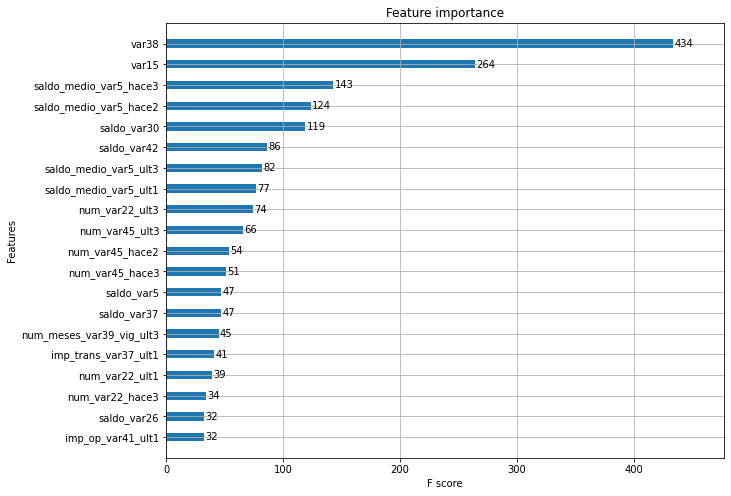

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## **9.3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

LightGBM으로 위 과정을 수행해 보겠습니다. 먼저 데이터를 전처리합니다. 위 예제와 같습니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('/content/gdrive/MyDrive/santander-customer-satisfaction/train.csv')

cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3,
                                            random_state=0)

모델 학습을 수행하겠습니다.

In [3]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.833881	training's binary_logloss: 0.149605	valid_1's auc: 0.81209	valid_1's binary_logloss: 0.153277
[3]	training's auc: 0.839548	training's binary_logloss: 0.145485	valid_1's auc: 0.814018	valid_1's binary_logloss: 0.150052
[4]	training's auc: 0.845749	training's binary_logloss: 0.142197	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.147501
[5]	training's auc: 0.848218	training's binary_logloss: 0.139595	valid_1's auc: 0.821853	valid_1's binary_logloss: 0.145477
[6]	training's auc: 0.853054	training's binary_logloss: 0.137401	valid_1's auc: 0.822606	valid_1's binary_logloss: 0.144005
[7]	training's auc: 0.854533	training's binary_logloss: 0.135455	valid_1's auc: 0.823109	valid_1's binary_logloss: 0.14262
[8]	training's auc: 0.858009	training's binary_logloss: 0.133684	valid_1's

XGBoost보다 수행 시간이 더 빠르지만 XGBoost로 학습시킨 모델의 ROC-AUC 값인 0.8431보다 낮은 수치가 도출됐습니다.

하이퍼 파라미터 튜닝을 수행해 보겠습니다.

In [4]:
!pip install -U hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

목적 함수를 생성해 보겠습니다.

In [9]:
from sklearn.model_selection import KFold

def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])

    roc_auc_list = []
    
    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):

        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

최적 하이퍼 파라미터를 도출해 보겠습니다.

In [10]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
            fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30)
            )

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[27]	training's auc: 0.876261	training's binary_logloss: 0.129526	valid_1's auc: 0.828179	valid_1's binary_logloss: 0.139438
[28]	training's auc: 0.876911	training's binary_logloss: 0.129036	valid_1's auc: 0.828401	valid_1's binary_logloss: 0.139193
[29]	training's auc: 0.877979	training's binary_logloss: 0.128575	valid_1's auc: 0.828478	valid_1's binary_logloss: 0.138987
[30]	training's auc: 0.879402	training's binary_logloss: 0.128093	valid_1's auc: 0.829098	valid_1's binary_logloss: 0.138735
[31]	training's auc: 0.880046	training's binary_logloss: 0.127684	valid_1's auc: 0.829034	valid_1's binary_logloss: 0.138569
[32]	training's auc: 0.880787	training's binary_logloss: 0.12726	valid_1's auc: 0.829293	valid_1's binary_logloss: 0.138347
[33]	training's auc: 0.881426	training's binary_logloss: 0.126851	valid_1's auc: 0.829427	valid_1's binary_logloss: 0.138168
[34]	training's auc: 0.88209	training's binary_logloss: 0.126467	valid_1's auc: 0.829126	v

최적 하이퍼 파라미터로 모델을 다시 학습시키고 ROC-AUC 값을 산출해 보겠습니다.

In [11]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                           )

lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82892	training's binary_logloss: 0.156389	valid_1's auc: 0.803507	valid_1's binary_logloss: 0.15883
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.835359	training's binary_logloss: 0.151091	valid_1's auc: 0.811407	valid_1's binary_logloss: 0.154158
[3]	training's auc: 0.839502	training's binary_logloss: 0.147161	valid_1's auc: 0.814173	valid_1's binary_logloss: 0.150889
[4]	training's auc: 0.845263	training's binary_logloss: 0.14412	valid_1's auc: 0.816353	valid_1's binary_logloss: 0.148367
[5]	training's auc: 0.850227	training's binary_logloss: 0.141542	valid_1's auc: 0.821723	valid_1's binary_logloss: 0.146238
[6]	training's auc: 0.853691	training's binary_logloss: 0.139455	valid_1's auc: 0.825129	valid_1's binary_logloss: 0.144505
[7]	training's auc: 0.854532	training's binary_logloss: 0.137664	valid_1's auc: 0.825716	valid_1's binary_logloss: 0.143174
[8]	training's auc: 0.856062	training's binary_logloss: 0.136075	valid_1

피처 중요도를 그래프로 시각화해 보겠습니다.

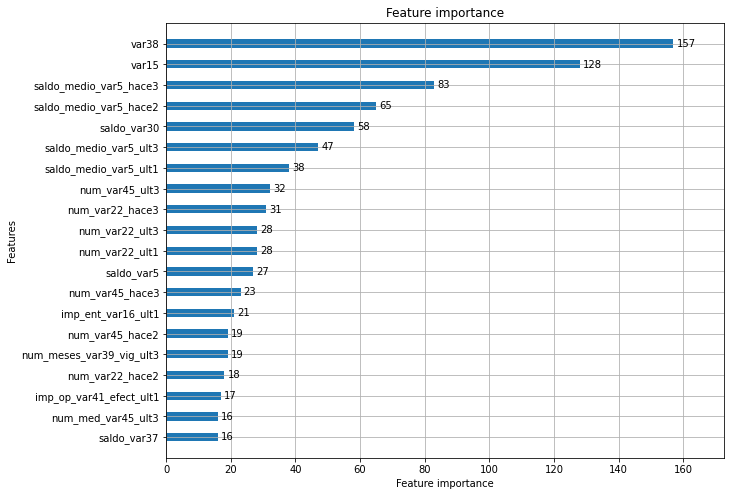

In [12]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(lgbm_clf, ax=ax , max_num_features=20, height=0.4)
plt.show()

# **10. 분류 실습 - 캐글 신용카드 사기 검출**

캐글의 [신용카드 데이터 세트](https://www.kaggle.com/mlg-ulb/creditcardfraud)를 사용하여 신용카드 사기 검출 분류 문제를 다뤄보겠습니다. 약 0.172%만 사기 트랜잭션이며 양성이고 레이블은 1입니다. 이처럼 사기 검출(Fraud Detection) 또는 이상 검출(Anomaly Detection)을 위한 데이터 세트는 일반적으로 양성과 음성의 비율이 매우 불균형한 분포를 가지는 경우가 많습니다. 


## **10.1. 언더 샘플링과 오버 샘플링의 이해**

레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능 문제가 발생할 수 있습니다. 이상 레이블 수가 너무 적어서 다양한 유형을 학습하지 못하고 정상 레이블에 치우친 학습만 하기 때문입니다. 이런 문제점을 해결하려면 **오버 샘플링(Oversampling)**과 **언더 샘플링(Undersampling)** 방법을 적절히 사용해야 합니다. 비교적으로 언더 샘플링보다 오버 샘플링이 예측 성능상 더 유리합니다. 

언더 샘플링은 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방법입니다. 에컨대 정상 레이블을 가진 데이터가 10,000건이고 이상 레이블을 가진 데이터가 100건이라면 정상 레이블 데이터를 이상 레이블 데이터 수준인 100건으로 줄입니다. 다만 이렇게 데이터 수를 줄이게 되면 학습에 필요한 충분한 데이터가 확보되지 않으므로 유용하지 않고 잘 사용하지 않는 방법입니다.

오버 샘플링은 언더 샘플링과 반대로 적은 데이터 세트를 증식하여 충분한 데이터를 확보하는 방법입니다. 동일한 데이터만 증식하는 방법은 오버피팅을 발생시키기 쉬우므로 원본 데이터의 피처 값들을 조금만 변경하여 증식합니다. 대표적인 방법은 **SMOTE(Synthetic Minority over-sampling Technique)**입니다. 적은 데이터 세트에 있는 개별 데이터들의 K-최근접 이웃을 찾아서 이 데이터와 이웃 K개의 차이를 일정 값으로 만들고 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성합니다. SMOTE는 `imbalanced-learn` 패키지에 구현되어 있습니다.

## **10.2. 데이터 일차 가공 및 모델 학습/예측/평가**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
card_df = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv/creditcard.csv')
card_df.head()

'Time' 피처는 데이터 생성 관련한 작업용 속성으로서 큰 의미가 없으므로 제거하겠습니다. 'Amount' 피처는 트랜잭션 금액이고, 'Class' 피처의 레이블은 0이면 정상이고 1이면 사기 트랜잭션입니다.

결측치를 확인하겠습니다.

In [ ]:
card_df.info()

In [ ]:
card_df.isnull().sum()

결측치는 없습니다.

'Time' 피처를 제거하는 함수를 선언하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

학습 피처/레이블 데이터 세트, 테스트 피처/레이블 데이터 세트를 반환하는 함수를 선언하겠습니다.


In [ ]:
def get_train_test_datasets(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

학습 데이터 세트와 테스트 데이터 세트로 나누겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_datasets(card_df)

각 데이터 세트의 레이블 값 비율을 확인해보겠습니다.

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print()
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

모델을 생성하겠습니다. 먼저 로지스틱 회귀를 사용합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, lr_pred, lr_pred_proba)

다음은 LightGBM을 사용하겠습니다. 우선 Estimator 객체와 학습 데이터 세트, 테스트 데이터 세트를 인자로 받는 학습, 예측, 평가 수행 함수를 선언하겠습니다.

In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

불균형한 레이블 분포를 가진 데이터 세트이므로 LightGBM의 `boost_from_average=False`로 지정해야 합니다. `True`로 지정할 경우 ROC-AUC 성능이 크게 저하됩니다.

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

로지스틱 회귀 모델보다 성능이 좋습니다.

## **10.3. 데이터 분포도 변환 후 모델 학습/예측 평가**

'Amount' 피처는 신용카드 사용 금액입니다. 정상과 비정상 트랜잭션을 판단하는 주요 피처일 것입니다. 'Amount' 피처의 값 분포도를 살펴보겠습니다. 참고로 로지스틱 회귀는 선형 모델이므로 주요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호합니다. 

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])
plt.show()

대부분 1,000 이하에 분포하고 27,000불까지 꼬리가 긴 분포 형태를 취합니다. 'Amount' 피처를 표준 정규 분포 형태로 변환하고 다시 성능을 측정해보겠습니다. 먼저 위에서 정의했던 `get_preprocessed_df()` 함수에 'Amount' 피처 값을 정규 분포 형태로 변환하는 코드를 추가하겠습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_datasets(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print()

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

성능은 그다지 향상되지 않았습니다.

이번엔 로그 변환을 수행해보겠습니다. 로그 변환은 데이터 분포도가 심한 왜곡 형태를 띌 경우 시도할 수 있습니다. `get_preprocessed_df()` 함수의 로직을 바꾸겠습니다.

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_datasets(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print()

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

성능이 전반적으로 조금씩 제고됐습니다.

## **10.4. 이상치 데이터 제거 후 모델 학습/예측/평가**

이상치를 찾는 방법 중에 **IQR(Inter Quantile Range)** 방식을 적용해 보겠습니다. IQR은 사분위(Quantile) 값의 편차를 이용하는 기법이며 박스 플롯으로 시각화할 수 있습니다. IQR은 25% 구간인 Q1부터 50% 구간인 Q2, 75% 구간인 Q3의 범위를 의미합니다.

IQR을 이용해 이상치 데이터를 검출하는 방식은 보통 IQR에 1.5를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주하는 것입니다. 75% 분위수(Q3)에 IQR\*1.5를 더해서 일반적인 데이터가 가질 수 있는 최댓값으로 가정하고, 25% 분위수(Q1)에 IQR\*1.5를 빼서 일반적인 데이터가 가질 수 있는 최솟값으로 가정합니다(1.5가 아닌 다른 값을 적용할 수도 있지만 보통 1.5를 적용합니다). 최댓값보다 크거나 최솟값보다 작으면 이상치로 판단합니다.

아래에서 이상치를 제거해 보겠습니다. 우선 어떤 피처의 이상치를 검출할 것인지 선택해야 합니다. 피처가 많은 경우 결정값과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 편이 좋습니다. 모든 피처들의 이상치를 검출하려면 오랜 시간이 소요되고, 결정값과 상관성이 높지 않은 피처들의 경우 이상치를 제거해도 성능이 크게 향상되지 않습니다. `DataFrame`의 `corr()` 메서드로 상관도를 구하고 히트맵으로 시각화하겠습니다.


In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

양의 상관관계가 높을수록 진한 파란색이고, 음의 상관관계가 높을수록 진한 빨간색입니다. 'Class' 피처와 음의 상관관계가 높은 피처는 'V14', 'V17'이며 이상치가 존재한다고 판단할 수 있습니다. 일단 'V14'만 이상치를 제거하겠습니다. IQR을 이용하여 이상치를 검출하는 함수를 선언하고 활용하겠습니다.

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # 사기(fraud)에 해당하는 `column`만 추출합니다.
    fraud = df[df['Class'] == 1][column]
    # 1/4 분위와 3/4 분위를 구합니다.
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고 최댓값과 최솟값을 구합니다.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 간주하고 인덱스를 반환합니다.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

이상치의 인덱스를 확인해보겠습니다.

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 인덱스:', outlier_index)

이상치를 제거하는 코드를 `get_preprocessed_df()` 함수에 추가하겠습니다.

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치를 제거하는 로직입니다.
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

각 모델의 성능을 확인하겠습니다.

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_datasets(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print()

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

전반적으로 성능이 크게 향상되었습니다. 특히 재현율의 향상이 눈에 띕니다.

## **10.5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야 합니다. 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링 하면 원본 데이터 세트가 아닌 데이터 세트에서 검증이나 테스트를 수행하므로 바르지 않습니다. 

In [ ]:
help(SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

로지스틱 회귀 모델을 생성해 보겠습니다.

In [ ]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

재현율은 높아졌지만 정밀도는 엄청나게 낮아졌습니다. SMOTE를 적용하면 재현율은 높아지고 정밀도는 낮아지는 것이 일반적인 현상입니다. 재현율은 높지만 매우 낮은 정밀도이므로 업무에는 적용하기 부적합합니다. 이는 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터 유형보다 많은 Class 1을 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class 1로 적용하여 정밀도가 매우 낮은 수준까지 떨어진 것입니다.

분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 그려서 문제점을 확인해보겠습니다. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [ ]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

로지스틱 회귀 모델로는 분류 결정 임곗값을 조정하더라도 임계값의 민감도가 심하기 때문에 적절한 재현율/정밀도 성능을 얻을 수 없습니다.

LightGBM 모델을 생성해 보겠습니다. 

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

재현율이 상승되고 정밀도는 약간 낮아졌습니다.

분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 그려보겠습니다.

In [ ]:
precision_recall_curve_plot(y_test, lgbm_clf.predict_proba(X_test)[:, 1])

전반적으로 LightGBM이 로지스틱 회귀보다 성능이 좋습니다. 위 내용을 복기할 때 데이터 전처리 시 변화하는 LightGBM 모델의 평가지표들을 위주로 살펴보면서 어떤 전처리 기법을 채용할지 가늠해 볼 수 있을 것입니다.

# **11. 스태킹 앙상블**

스태킹은 여러 알고리즘을 결합하여 예측 결과를 도출한다는 점에서 배깅과 부스팅과 공통점을 가집니다. 큰 차이점이라면 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는 것입니다. 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 **메타 데이터 세트**로 만들어 별도의 최종 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식입니다. 이렇게 개별 모델의 예측된 데이터 세트를 다시 기반으로 학습하고 예측하는 방식을 **메타 모델**이라고 부릅니다. 

스태킹 모델은 두 종류의 모델이 필요합니다. 첫 번째는 (많은)개별적인 기반 모델, 두 번째는 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델입니다. 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합하여 최종 메타 모델의 학습용 피처 데이터 세트와 피처 데이터 세트를 만드는 것입니다.

기실 실전에서는 스태킹을 거의 사용하지 않습니다. 캐글과 같은 대회에서 성능을 조금이나마 높이기 위한 용도로 사용할 뿐입니다. 스태킹을 적용한다고 성능이 반드시 향상되지도 않습니다. 이번 파트에서는 자세한 설명들은 생략하고 넘어가겠습니다.

## **11.1. 기본 스태킹 모델**

기본 스태킹 모델을 위스콘신 암 데이터 세트에 적용하겠습니다. 개별 모델을 최적 하이퍼 파라미터로 튜닝하는 작업은 생략하겠습니다. 다만 실전에서 스태킹을 수행할 경우엔 반드시 개별 모델을 최적 하이퍼 파라미터로 학습시켜서 최적의 스태킹 모델을 생성해야 합니다.

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label,
                                                    test_size=0.2, random_state=0)

# 개별 모델입니다.
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 모델입니다.
lr_final = LogisticRegression(C=10)

# 개별 모델을 학습시킵니다. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 개별 모델의 정확도를 측정합니다. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {:.4f}'.format(accuracy_score(y_test, ada_pred)))

개별 알고리즘으로 예측한 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만들고 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 재사용하겠습니다. 반환된 예측 데이터 세트는 1차원 형태이므로 일단 모든 예측 데이터 세트를 행으로 붙이겠습니다.

In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

행과 열을 바꿔서 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만들겠습니다.

In [ ]:
pred = np.transpose(pred)
print(pred.shape)

최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정하겠습니다.

In [ ]:
# 메타 데이터와 테스트 데이터(`y_test`)를 기반으로 최종 메타 모델을 학습시킵니다.
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {:.4f}'.format(accuracy_score(y_test, final)))

## **11.2. CV 세트 기반의 스태킹**

CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터를 이용합니다. 바로 위 코드에서 최종적으로 학습할 때 테스트용 레이블 데이터 세트인 `y_test`를 기반으로 학습했기 때문에 과적합 문제가 발생할 수 있습니다.

CV 세트 기반의 스태킹은 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행합니다. 2단계 스텝으로 구분할 수 있습니다.

- 스텝 1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성합니다.

- 스텝 2: 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성합니다. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 데이터 세트를 생성합니다. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 합습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가합니다.

좀 더 간단하게 cv 세트 기반의 스태킹 모델 프로세스를 설명하자면 아래 목록 순으로 제시할 수 있습니다.

1. 훈련 데이터 세트를 폴드 N개로 나눕니다. 일단 폴드 3개로 나누었다고 가정하겠습니다.

1. 폴드 2개를 학습을 위한 데이터 폴드로, 폴드 1개를 검증을 위한 데이터 폴드로 사용합니다.

1. 위의 폴드 2개를 이용해 개별 모델을 학습합니다. 검증용 폴드 1개로는 데이터를 예측하고 결과를 저장합니다.

1. 위 프로세스를 학습용 폴드와 검증용 폴드를 변경하면서 3번 반복하고, 테스트 데이터 세트에 대한 예측값의 평균으로 최종 예측 결괏값을 생성합니다.

1. 생성된 최종 예측 결괏값을 메타 모델에 학습하고 예측을 수행합니다.

위 과정을 그림으로 제시하면 아래와 같습니다.

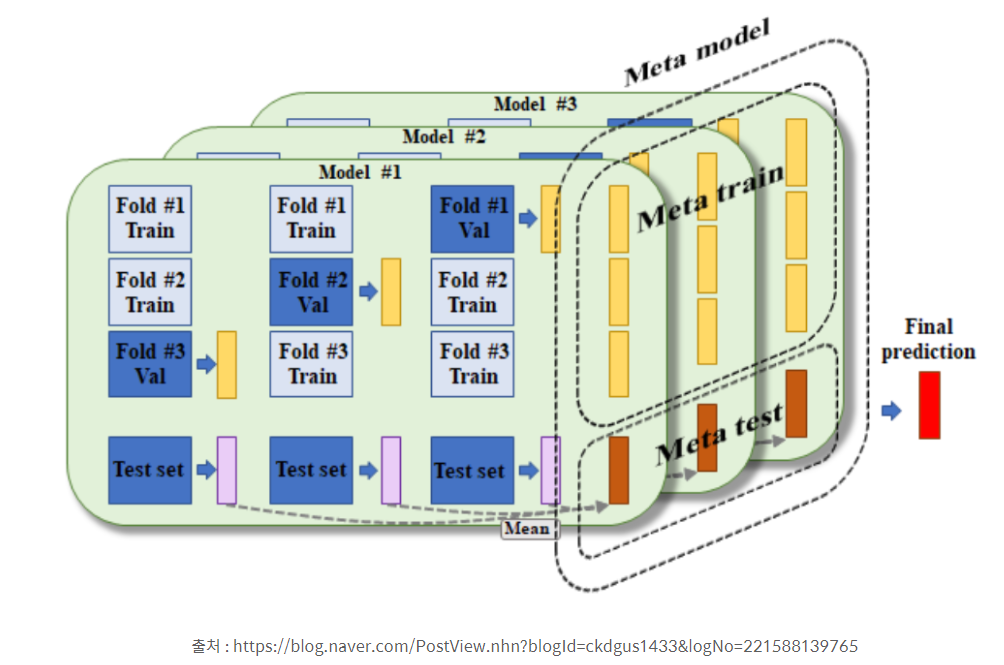

위 내용을 코드로 구현해 보겠습니다. 스텝 1을 구현하겠습니다. 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수를 선언하겠습니다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 `n_folds` 값으로 `KFold`를 생성합니다.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    # 추후 메타 모델이 사용할 학습 데이터를 반환하기 위해 넘파이 배열을 초기화합니다.
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습, 예측할 폴드 데이터 세트를 추출합니다.
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습을 수행합니다.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후에 데이터를 저장합니다.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후에 데이터를 저장합니다.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성합니다.
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    # `train_fold_pred`는 최종 메타 모델이 사용하는 학습 데이터이고,
    # `test_pred_mean`은 테스트 데이터입니다.
    return train_fold_pred, test_pred_mean

각 기반 모델별로 `get_stacking_base_datasets` 함수를 호출하여 메타 모델에 사용할 학습 데이터 세트와 테스트 데이터 세트를 반환하겠습니다.

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

이제 스텝 2를 구현하겠습니다. 각 모델별 학습 데이터와 테스트 데이터를 합쳐야 합니다. 

In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 shape:', X_train.shape, '원본 테스트 피처 shape', X_test.shape)
print('스태킹 학습 피처 데이터 shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 shape;', Stack_final_X_test.shape)

`Stack_final_X_train`은 메타 모델이 학습할 학습용 피처 데이터 세트입니다. `Stack_final_X_test`는 메타 모델이 예측할 테스트용 피처 데이터 세트입니다. 스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우 크기는 같고, 개별 모델 예측값 4개를 합친 것이므로 칼럼 크기는 4입니다.

최종 메타 모델을 학습시키겠습니다.

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {:.4f}'.format(accuracy_score(y_test, stack_final)))

# **12. 정리**

생략합니다.